In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
diabetes_df = pd.read_csv("./Datasets/diabetes.csv")
train_df, test_df = train_test_split(diabetes_df, test_size = 0.3, random_state = 22)
X_train = train_df.drop("Outcome", axis = 1)
y_train = train_df["Outcome"]
X_test = test_df.drop("Outcome", axis = 1)
y_test = test_df["Outcome"]

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Best Cross-validation Score: 0.6140590188351382

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       150
           1       0.63      0.52      0.57        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231



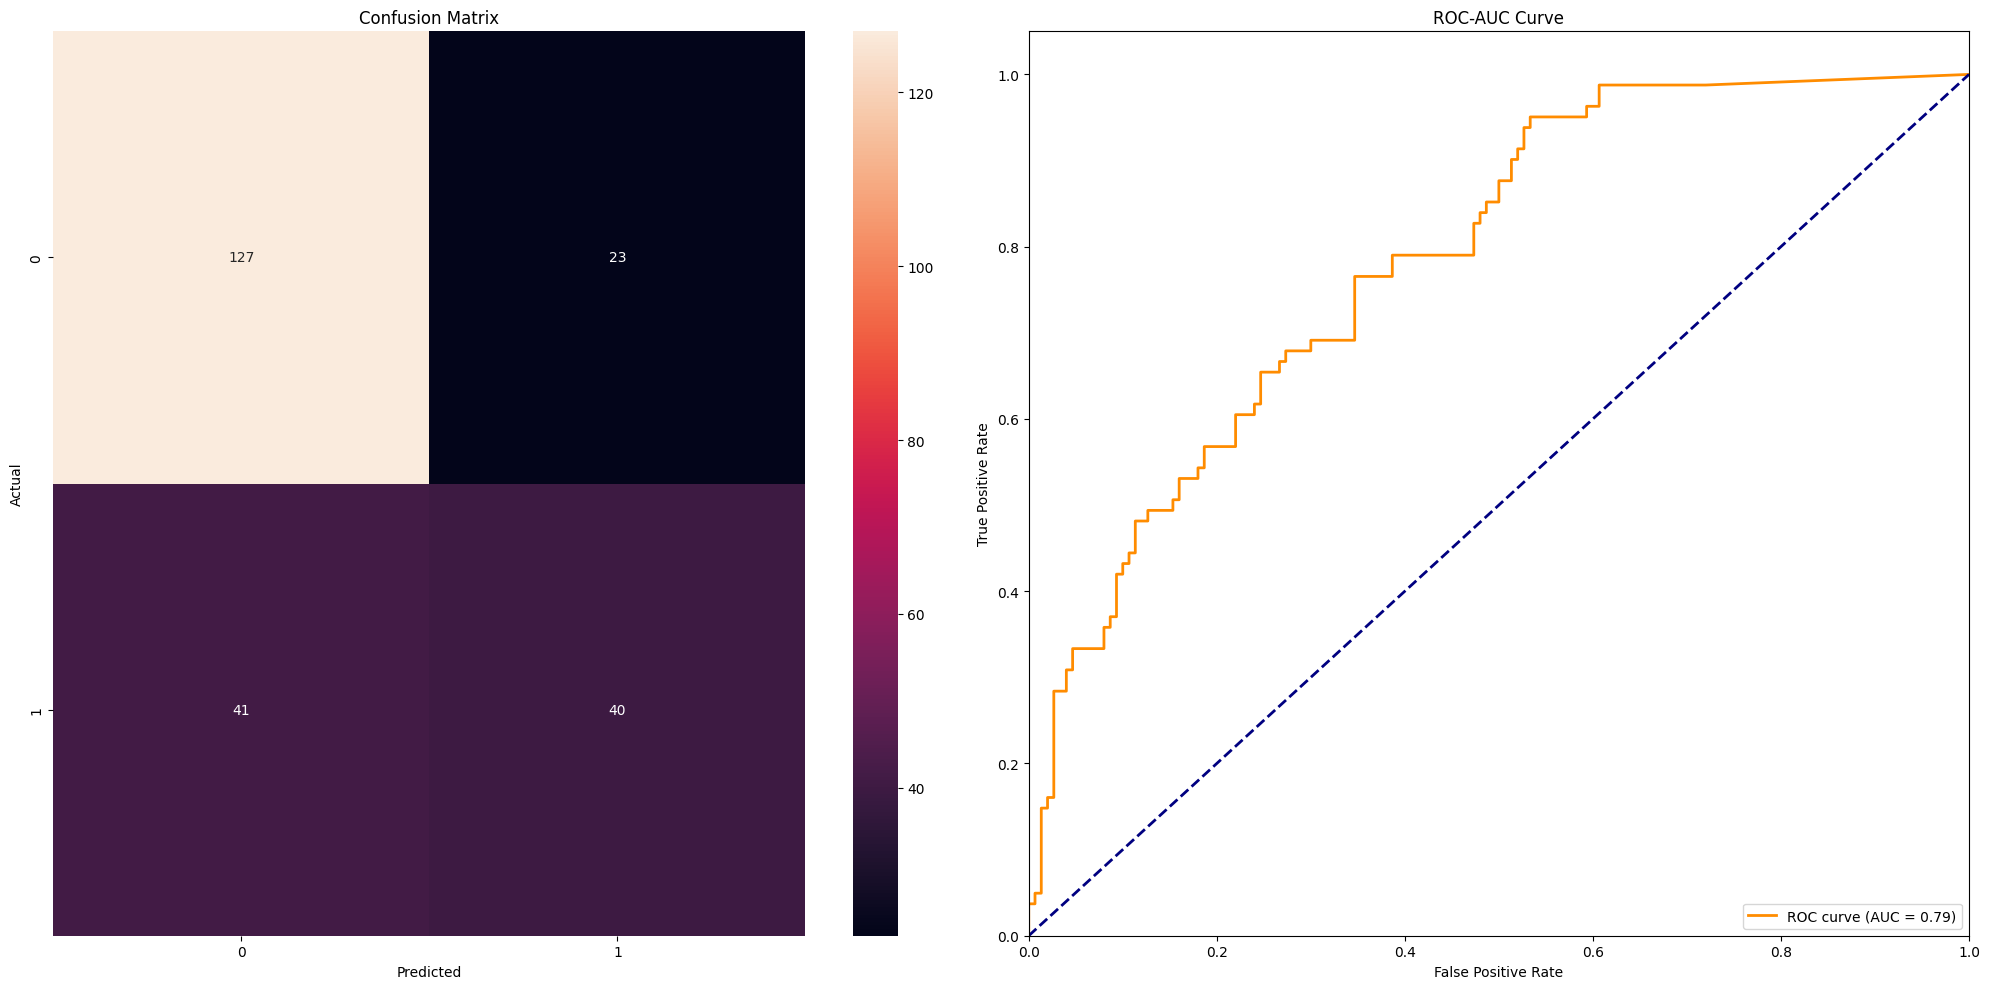

In [5]:
results_knn = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [6]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: DiabetesPedigreeFunction
Current performance: 0.74459
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']


Removed feature: SkinThickness
Current performance: 0.75758
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']


Removed feature: Pregnancies
Current performance: 0.77489
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']


Removed feature: Insulin
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'BMI', 'Age']


Removed feature: Age
Current performance: 0.75758
Remaining features: ['Glucose', 'BloodPressure', 'BMI']



n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'validation_fraction': 0.1, 'tol': 0.001, 'penalty': 'l1', 'max_iter': 500, 'early_stopping': True, 'alpha': 0.0001}

Best Cross-validation Score: 0.5671333713844342

Feature Importances: {'Pregnancies': 0.024810393660204877, 'Glucose': 3.010561793196427, 'BloodPressure': 0.0, 'SkinThickness': 0.029081939616371844, 'Insulin': 1.8515566354402935, 'BMI': 4.674470570809529, 'DiabetesPedigreeFunction': 4.2329884514660066, 'Age': 2.5328329189644343}

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       150
           1       0.60      0.52      0.56        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



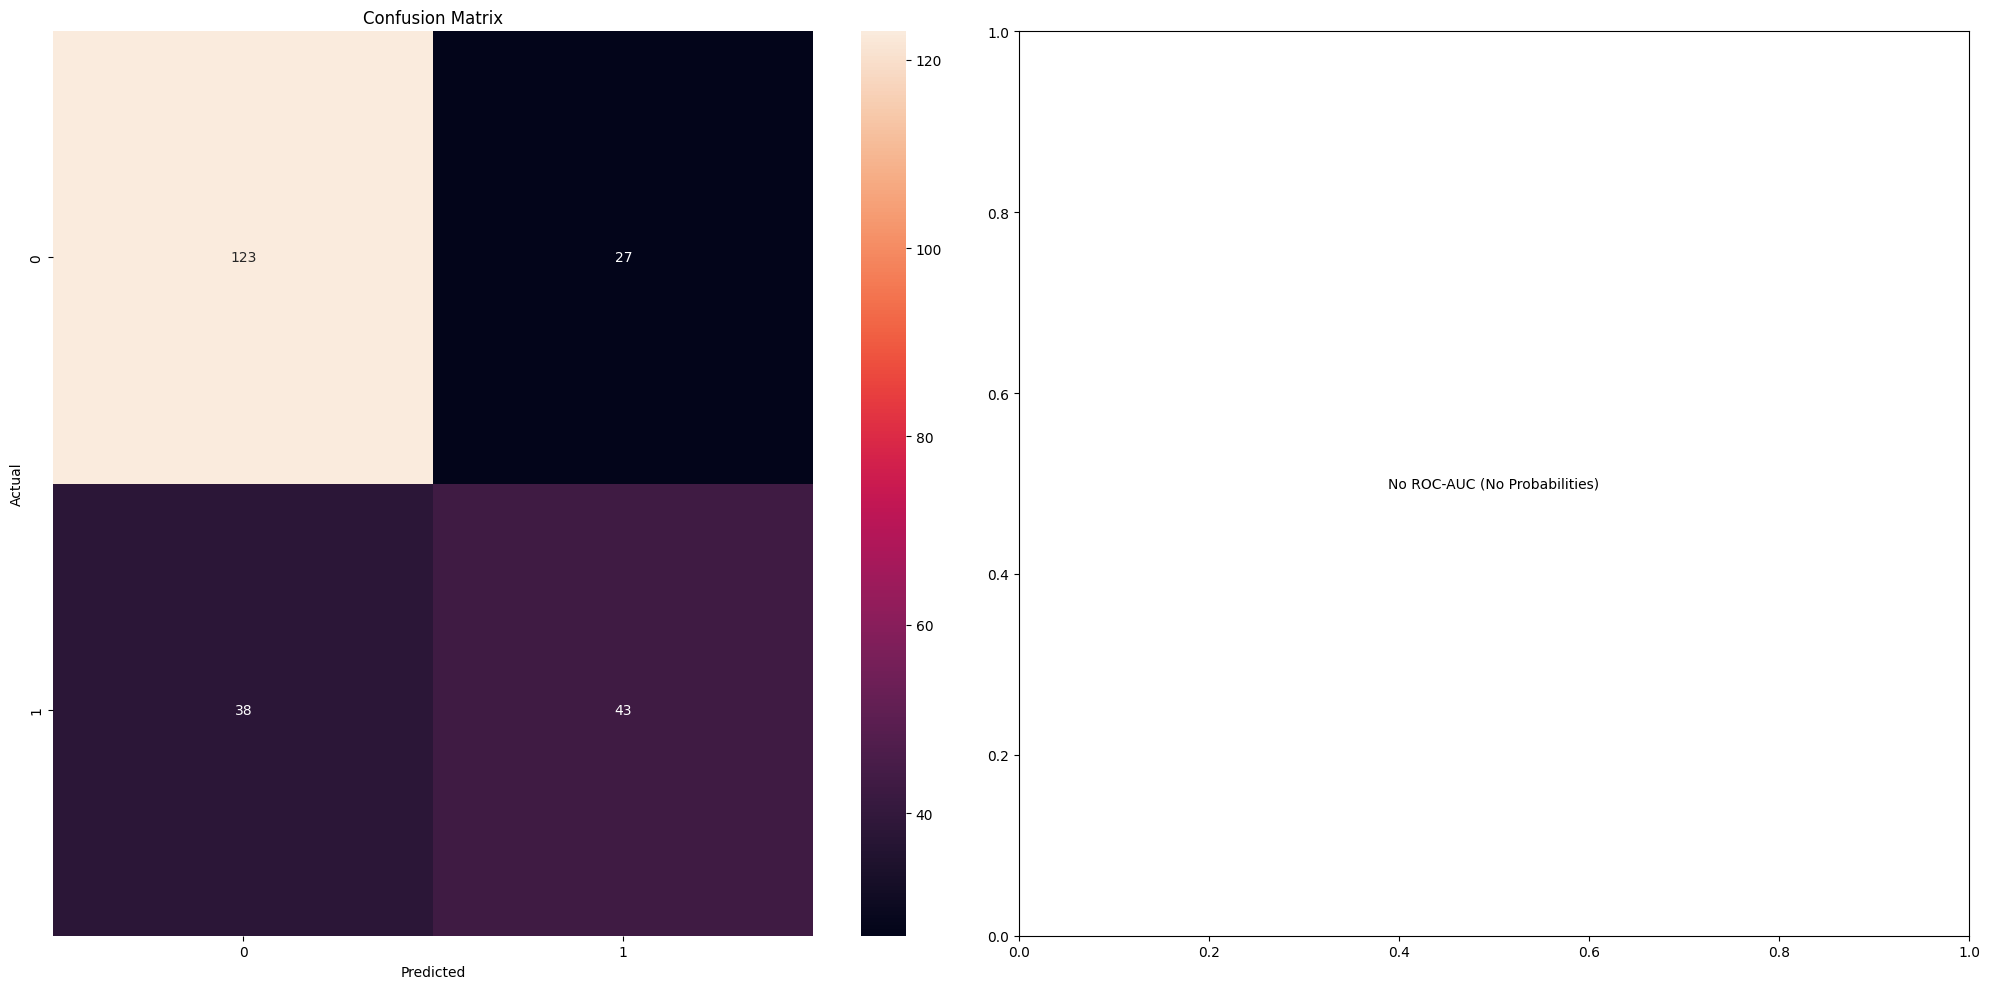

In [7]:
results_perceptron = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [8]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: SkinThickness
Current performance: 0.77489
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: BMI
Current performance: 0.72294
Remaining features: ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: BloodPressure
Current performance: 0.76623
Remaining features: ['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Insulin
Current performance: 0.66234
Remaining features: ['Pregnancies', 'Glucose', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Age
Current performance: 0.63636
Remaining features: ['Pregnancies', 'Glucose', 'DiabetesPedigreeFunction']



n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Best Cross-validation Score: 0.6947435040562304

Feature Importances: {'Pregnancies': 0.05584839766113215, 'Glucose': 0.39093037633510586, 'BloodPressure': 0.051777514607121364, 'SkinThickness': 0.044305771341077216, 'Insulin': 0.04172346677291238, 'BMI': 0.1832325938724236, 'DiabetesPedigreeFunction': 0.07969630439430012, 'Age': 0.15248557501592733}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       150
           1       0.64      0.68      0.66        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



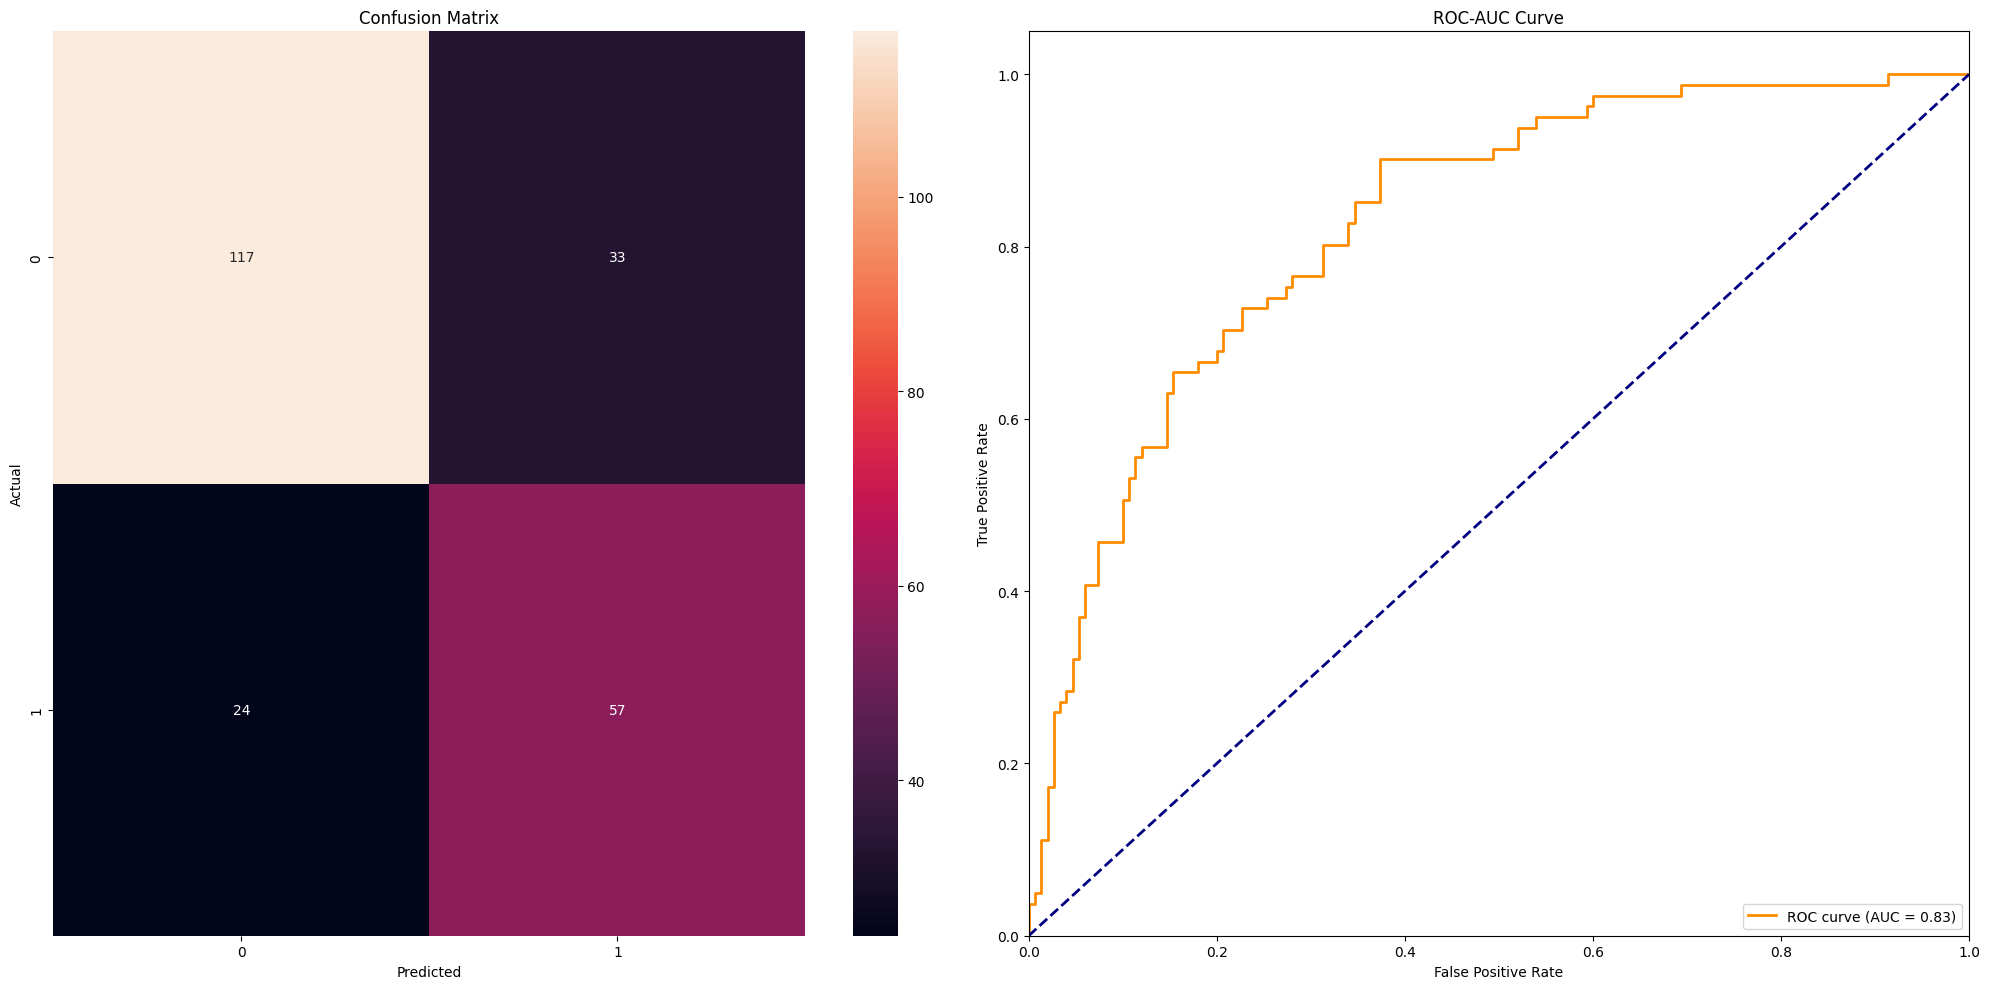

In [9]:
results_rf = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [10]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: Pregnancies
Current performance: 0.7619
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: SkinThickness
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: DiabetesPedigreeFunction
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age']


Removed feature: Insulin
Current performance: 0.75758
Remaining features: ['Glucose', 'BloodPressure', 'BMI', 'Age']


Removed feature: Age
Current performance: 0.75758
Remaining features: ['Glucose', 'BloodPressure', 'BMI']



n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.01, 'max_features': None, 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced'}

Best Cross-validation Score: 0.6572224402037137

Feature Importances: {'Pregnancies': 0.0, 'Glucose': 0.7765883816404963, 'BloodPressure': 0.0, 'SkinThickness': 0.0, 'Insulin': 0.0, 'BMI': 0.22341161835950374, 'DiabetesPedigreeFunction': 0.0, 'Age': 0.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.64      0.60      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



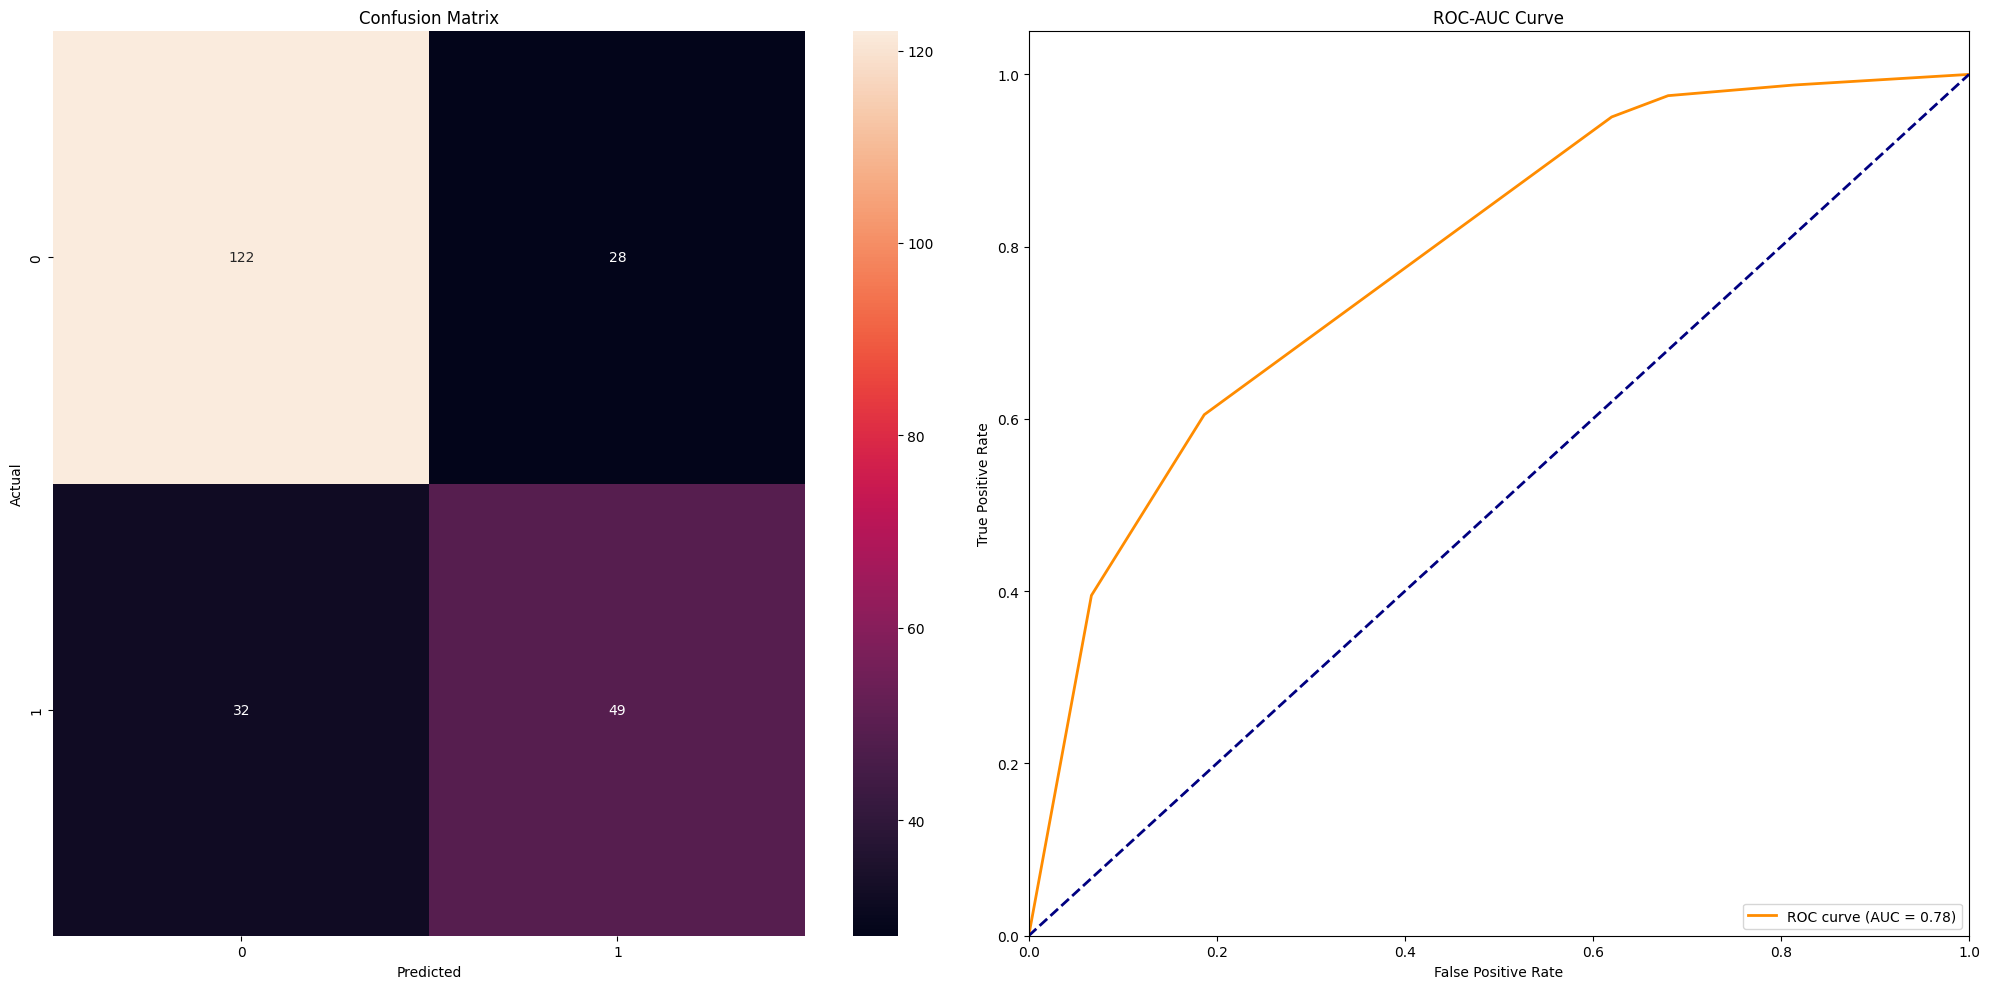

In [11]:
results_dt = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [12]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)


Removed feature: BloodPressure
Current performance: 0.7316
Remaining features: ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: BMI
Current performance: 0.70996
Remaining features: ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: SkinThickness
Current performance: 0.71429
Remaining features: ['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Pregnancies
Current performance: 0.74026
Remaining features: ['Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Glucose
Current performance: 0.64069
Remaining features: ['Insulin', 'DiabetesPedigreeFunction', 'Age']



n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'kernel': 'poly', 'gamma': 0.001, 'degree': 2, 'coef0': 0.5, 'class_weight': 'balanced', 'C': 100}

Best Cross-validation Score: 0.6746445470651349

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       150
           1       0.62      0.68      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.74       231



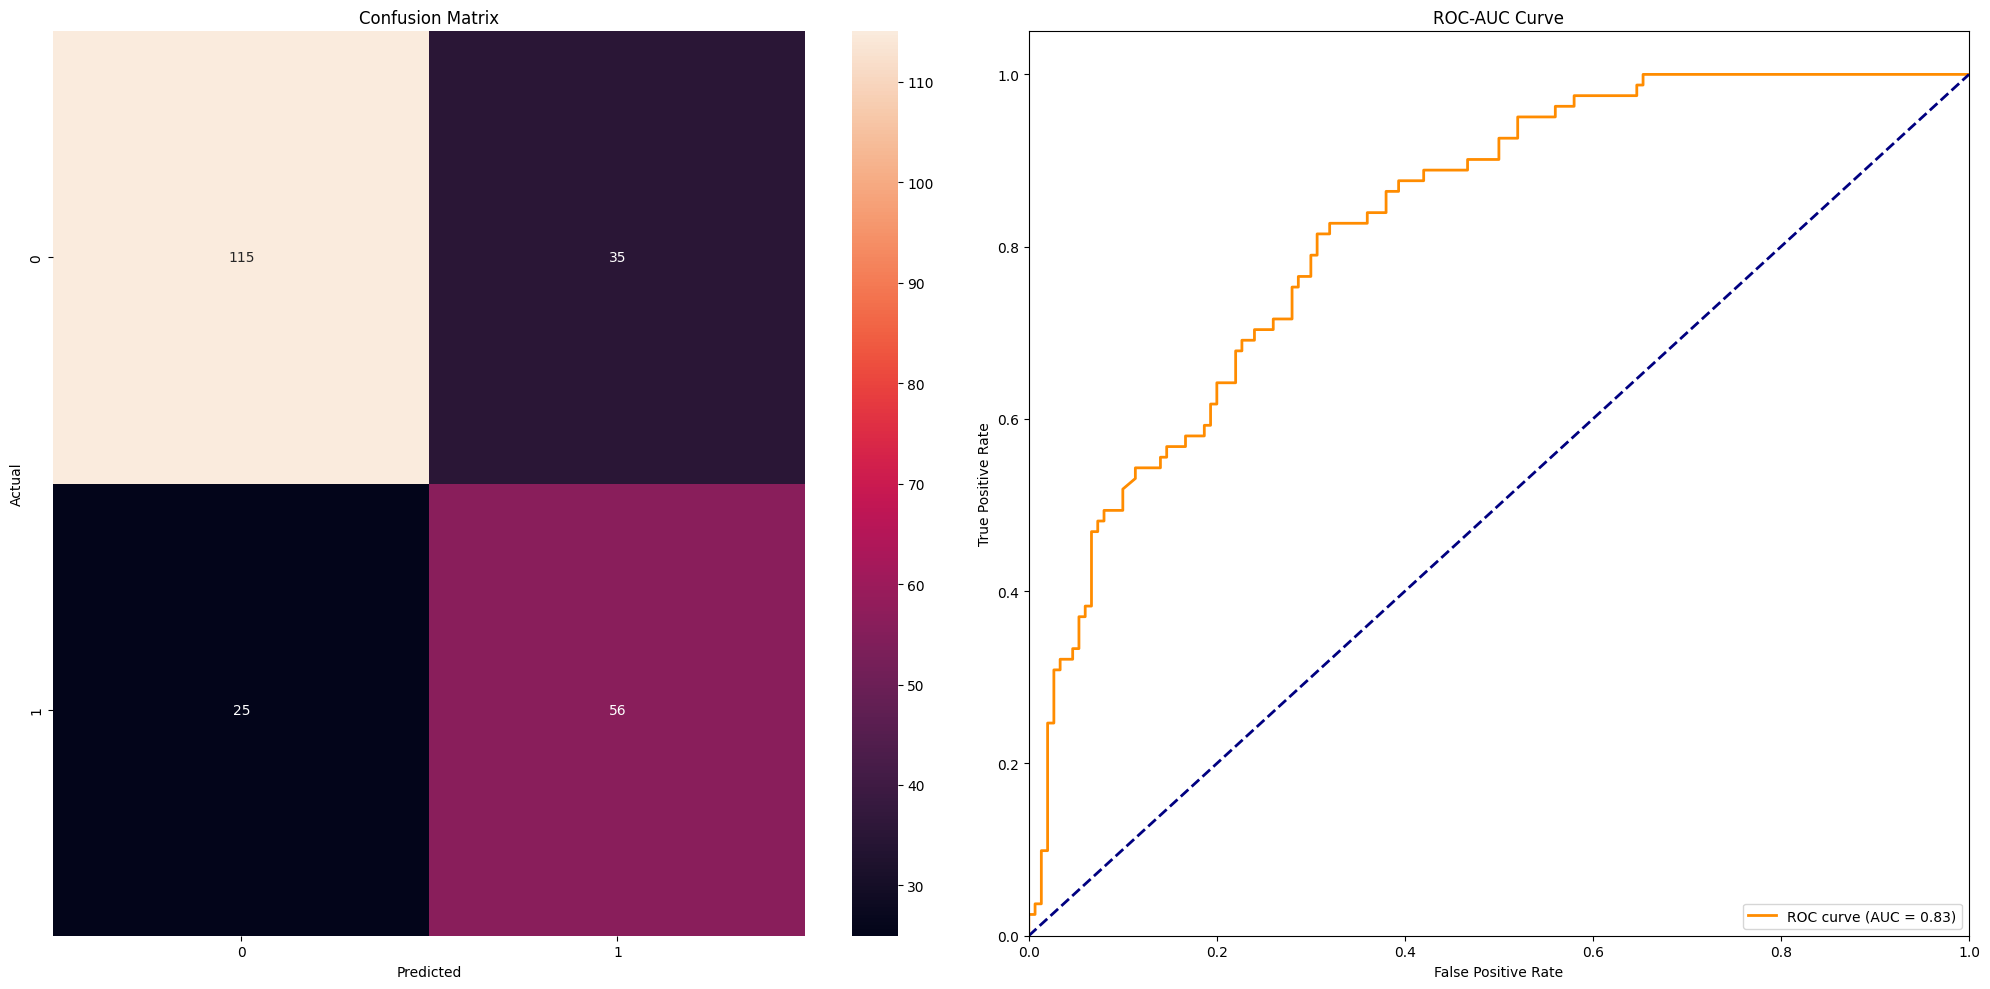

In [13]:
results_svm = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm')

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [14]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: Pregnancies
Current performance: 0.75758
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Age
Current performance: 0.7619
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: Insulin
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: BloodPressure
Current performance: 0.75758
Remaining features: ['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: SkinThickness
Current performance: 0.74459
Remaining features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']



In [21]:
sbs_smpa = SequentialBackwardSelection(estimator=grid_search.best_estimator_,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)


Removed feature: Pregnancies
Current performance: 0.75758
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Removed feature: Age
Current performance: 0.7619
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: Insulin
Current performance: 0.76623
Remaining features: ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: BloodPressure
Current performance: 0.75758
Remaining features: ['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']


Removed feature: SkinThickness
Current performance: 0.74459
Remaining features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']

